<a href="https://colab.research.google.com/github/mdsaniulbasirsaz/Deep-Learning/blob/main/LinearModel2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Estimate salary of worker with work experience(S).
Equation:
y = 5000x + 2000





* x = Work experience(in Year)
* y = Perdict Salary
* w = weight, How much the salary iincreases with each year of experience
* b = 2000; Provides a starting salary even if the worker has no experience

In [ ]:
import torch
import torch.nn  as nn
import torch.optim as optim

In [ ]:
class LinearModel(nn.Module):
  def __init__(self):
    super(LinearModel,self).__init__()
    self.linear = nn.Linear(1,1)

  def forward(self,x):
    return self.linear(x)

In [ ]:
model = LinearModel()
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(),lr=0.01)

In [ ]:

exerience = torch.tensor([[1.0],[2.0],[3.0],[4.0],[5.0]])
w = 5000
b = 2000
salary = w * exerience + b
print("salary:{}".format(salary))

salary:tensor([[ 7000.],
        [12000.],
        [17000.],
        [22000.],
        [27000.]])


In [ ]:
experience = torch.tensor([[1.0],[2.0],[3.0],[4.0],[5.0]])
salary = torch.tensor([[ 7000.0],[12000.0],[17000.0],[22000.0],[27000.0]])

In [ ]:

for epoch in range(1000):
  model.train()
  optimizer.zero_grad()

  outputs = model(experience)
  loss = criterion(outputs,salary)
  loss.backward()
  optimizer.step()
  if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch+1}/1000], Loss: {loss.item():.4f}')

Epoch [100/1000], Loss: 34.7358
Epoch [200/1000], Loss: 17.6497
Epoch [300/1000], Loss: 8.9683
Epoch [400/1000], Loss: 4.5551
Epoch [500/1000], Loss: 2.3169
Epoch [600/1000], Loss: 1.1777
Epoch [700/1000], Loss: 0.5987
Epoch [800/1000], Loss: 0.3041
Epoch [900/1000], Loss: 0.1546
Epoch [1000/1000], Loss: 0.0789


In [ ]:
model.eval()
test_experience = torch.tensor([[1.0],[2.0],[3.0],[4.0],[5.0],[10.0],[11.0]])
predicted_salary = model(test_experience)
for exp, sal in zip(test_experience, predicted_salary):
    print(f'Predicted salary for {exp.item()} years of experience: {sal.item():.2f} taka')

Predicted salary for 1.0 years of experience: 6986.03 taka
Predicted salary for 2.0 years of experience: 11991.38 taka
Predicted salary for 3.0 years of experience: 16996.74 taka
Predicted salary for 4.0 years of experience: 22002.09 taka
Predicted salary for 5.0 years of experience: 27007.44 taka
Predicted salary for 10.0 years of experience: 52034.19 taka
Predicted salary for 11.0 years of experience: 57039.54 taka


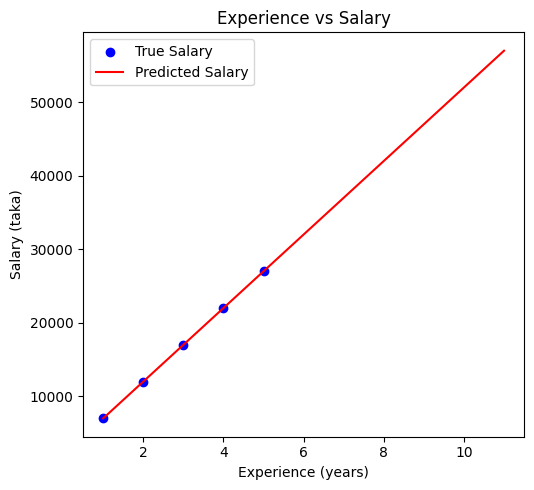

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.scatter(experience.numpy(), salary.numpy(), color='blue', label='True Salary')
plt.plot(test_experience.numpy(), predicted_salary.detach().numpy(), color='red', label='Predicted Salary')
plt.xlabel('Experience (years)')
plt.ylabel('Salary (taka)')
plt.title('Experience vs Salary')
plt.legend()



plt.tight_layout()
plt.show()